In [55]:
from sklearn.datasets import make_blobs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

[1] (аналогично Заданию 2) Используя make_blobs с любым random_state, сгенерировать датасет df, в котором есть три класса с размером каждого класса  100, четыре количественных (недискретных) признака ,а центры классов зафиксированы в следующих точках: Класс 0 – (+1, +1, +1, +1), Класс 1 – (-1,-1,-1,- 1), Класс 2 –(-1,+1,-1,+1). 

In [56]:
num = 100
centers = [[1, 1, 1, 1], [-1, -1, -1, -1], [-1, 1, -1, 1]]
X, y = make_blobs(n_samples=3 * num, centers=centers, n_features=4, random_state=42)

df1 = pd.DataFrame(X, columns=[f'Feature_{i + 1}' for i in range(4)])
df1['Class'] = y

[2] Не забываем повторять шаги с задания 1- ключевые характеристики датасета, корреляции, визуализация на всех парах var

In [57]:
def show_plot(df, name):
    # Форма датасета
    dataset_shape = df.shape
    num_features = df.shape[1] - 1
    target_classes_count = df['Class'].value_counts()
    missing_percentage = df.isnull().mean() * 100

    # Вывод ключевых характеристик
    print("Описание датасета:")
    description = df.describe()
    print(
        f'Форма датасета: {dataset_shape}\n'
        f'Число признаков: {num_features}\n'
        f'Число объектов в каждом классе:\n{target_classes_count}\n'
        f'Процент пропущенных значений:\n{missing_percentage}\n'
    )
    print(description)

    # Корреляционная матрица
    print("\nКорреляционная матрица:")
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Корреляционная матрица для {name}')
    plt.show()

    # Визуализация парных распределений
    sns.pairplot(df, hue='Class', diag_kind='kde', palette='Set2')
    plt.suptitle(f'Попарные графики для {name}', y=1.02)
    plt.show()

Описание датасета:
Форма датасета: (300, 5)
Число признаков: 4
Число объектов в каждом классе:
Class
1    100
0    100
2    100
Name: count, dtype: int64
Процент пропущенных значений:
Feature_1    0.0
Feature_2    0.0
Feature_3    0.0
Feature_4    0.0
Class        0.0
dtype: float64

        Feature_1   Feature_2   Feature_3   Feature_4       Class
count  300.000000  300.000000  300.000000  300.000000  300.000000
mean    -0.290793    0.347177   -0.279180    0.376324    1.000000
std      1.302909    1.424841    1.359680    1.383420    0.817861
min     -3.650970   -2.804882   -3.696887   -3.301921    0.000000
25%     -1.232938   -0.567018   -1.250467   -0.548240    0.000000
50%     -0.372631    0.490000   -0.404749    0.459384    1.000000
75%      0.599307    1.342490    0.697384    1.422482    2.000000
max      3.314659    4.852731    3.189803    3.720169    2.000000

Корреляционная матрица:


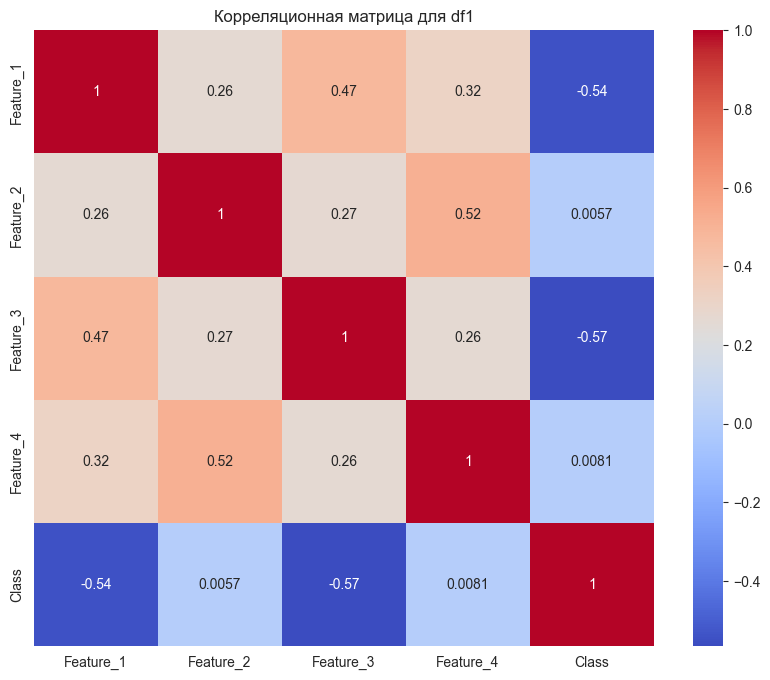

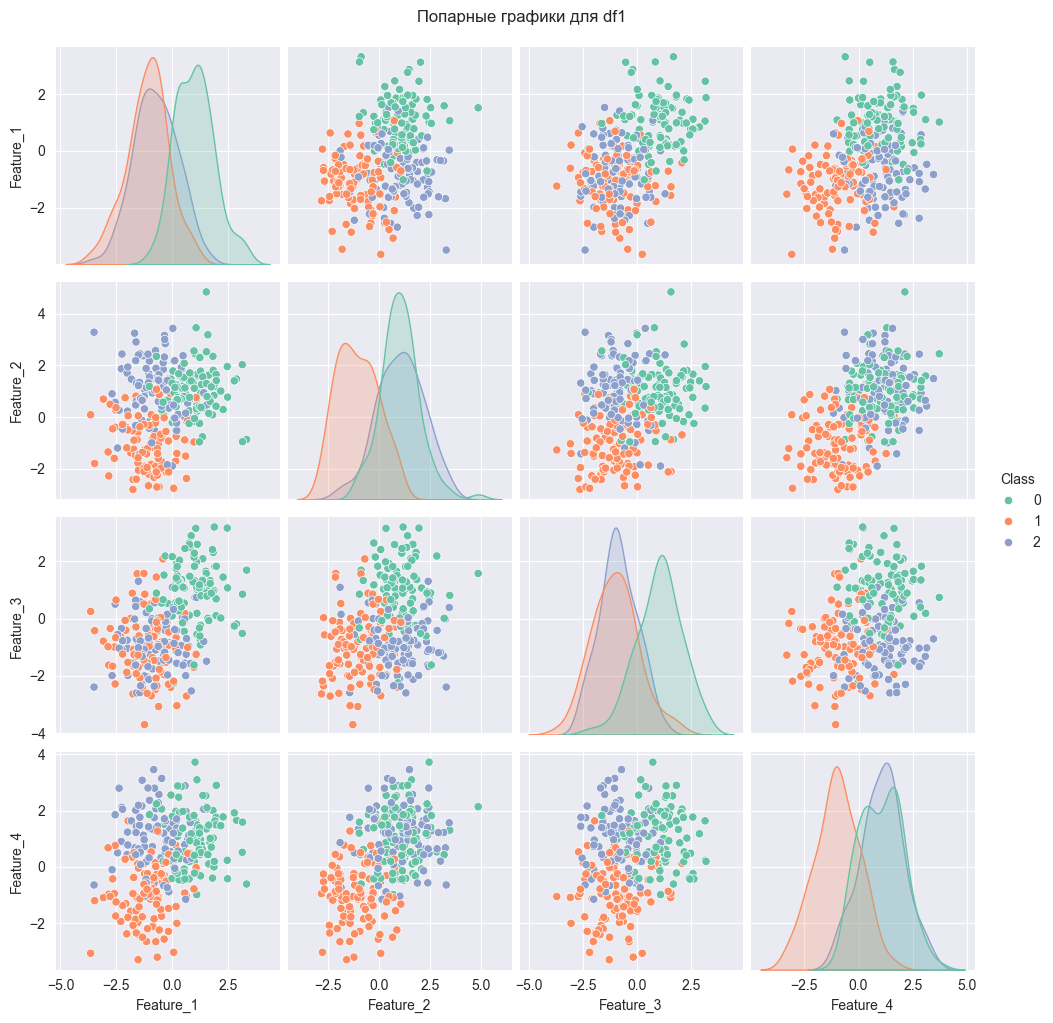

In [58]:
show_plot(df1, "df1")

[3] На основе созданного в пункте [1] датасета сгенерировать отдельные  дополнительные датасеты (df_A_B), в которых к классу 0 добавлено A одинаковых точек с координатами (+B,-B,+B,-B), где A = 1, 10, 100 и B = 5, 10, 20, при этом количество объектов в остальных классах неизменно. 

In [59]:
import numpy as np
import pandas as pd


# Функция для добавления точек в класс 0
def generate_augmented_dataset(df, A, B):
    # Координаты новых точек для класса 0
    new_points = np.array([[B, -B, B, -B]] * A)
    # Класс 0 — это новые точки
    new_classes = np.zeros(A)

    # Объединяем новые точки с исходным датасетом
    new_df = pd.DataFrame(new_points, columns=df.columns[:-1])  # Только признаки (без 'Class')
    new_df['Class'] = new_classes  # Добавляем колонку 'Class'

    # Объединяем новые точки с исходным датасетом
    df_augmented = pd.concat([df[df['Class'] != 0], new_df], ignore_index=True)

    return df_augmented

In [60]:
# Пример создания нового датасета с 1, 10 и 100 точками для B=5
df_A_1_B_5 = generate_augmented_dataset(df1, 1, 5)
df_A_10_B_5 = generate_augmented_dataset(df1, 10, 5)
df_A_100_B_5 = generate_augmented_dataset(df1, 100, 5)

# Для других значений B, например, B=10 и B=20, повторяем ту же операцию
df_A_1_B_10 = generate_augmented_dataset(df1, 1, 10)
df_A_10_B_10 = generate_augmented_dataset(df1, 10, 10)
df_A_100_B_10 = generate_augmented_dataset(df1, 100, 10)

# Как выглядит новый датасет
print(df_A_1_B_5.head())
print(df_A_10_B_5.head())
print(df_A_100_B_5.head())
print(df_A_1_B_10.head())
print(df_A_10_B_10.head())
print(df_A_100_B_10.head())

   Feature_1  Feature_2  Feature_3  Feature_4  Class
0  -0.591747  -2.702584   0.029156  -0.527403    1.0
1  -0.354624   0.368632  -1.964923  -0.313949    1.0
2  -0.405246   1.853416  -0.241071   1.281191    2.0
3  -3.471645  -1.796895  -0.422928  -1.203045    1.0
4  -2.840874  -2.279577  -1.624819  -0.973909    1.0
   Feature_1  Feature_2  Feature_3  Feature_4  Class
0  -0.591747  -2.702584   0.029156  -0.527403    1.0
1  -0.354624   0.368632  -1.964923  -0.313949    1.0
2  -0.405246   1.853416  -0.241071   1.281191    2.0
3  -3.471645  -1.796895  -0.422928  -1.203045    1.0
4  -2.840874  -2.279577  -1.624819  -0.973909    1.0
   Feature_1  Feature_2  Feature_3  Feature_4  Class
0  -0.591747  -2.702584   0.029156  -0.527403    1.0
1  -0.354624   0.368632  -1.964923  -0.313949    1.0
2  -0.405246   1.853416  -0.241071   1.281191    2.0
3  -3.471645  -1.796895  -0.422928  -1.203045    1.0
4  -2.840874  -2.279577  -1.624819  -0.973909    1.0
   Feature_1  Feature_2  Feature_3  Feature_4 

[4] Выбрать пару классов (включая класс с повторенными объектами) и один количественный признак.
 
Для каждого из датасетов df и df_A_B в своем пространстве Х-Y (количественный признак-класс) построить и визуализировать объекты, линию линейной регрессии и линию логистической регрессии. Регрессии строить на паре Х-Y(количественный признак-класс).

Оценить качество работы полученных на основе логистической регрессии классификаторов, используя ROC кривые, восстановив на графике ROC кривых точку классификации Sensitivity-Specificity и доверительные интервалы CI95 
бутстрепом (n=1000).

Все полученные графики возможно расположить в две колонки: левая колонка –  визуализация пространства и регрессий, правая – графики с ROC кривой и точкой. 

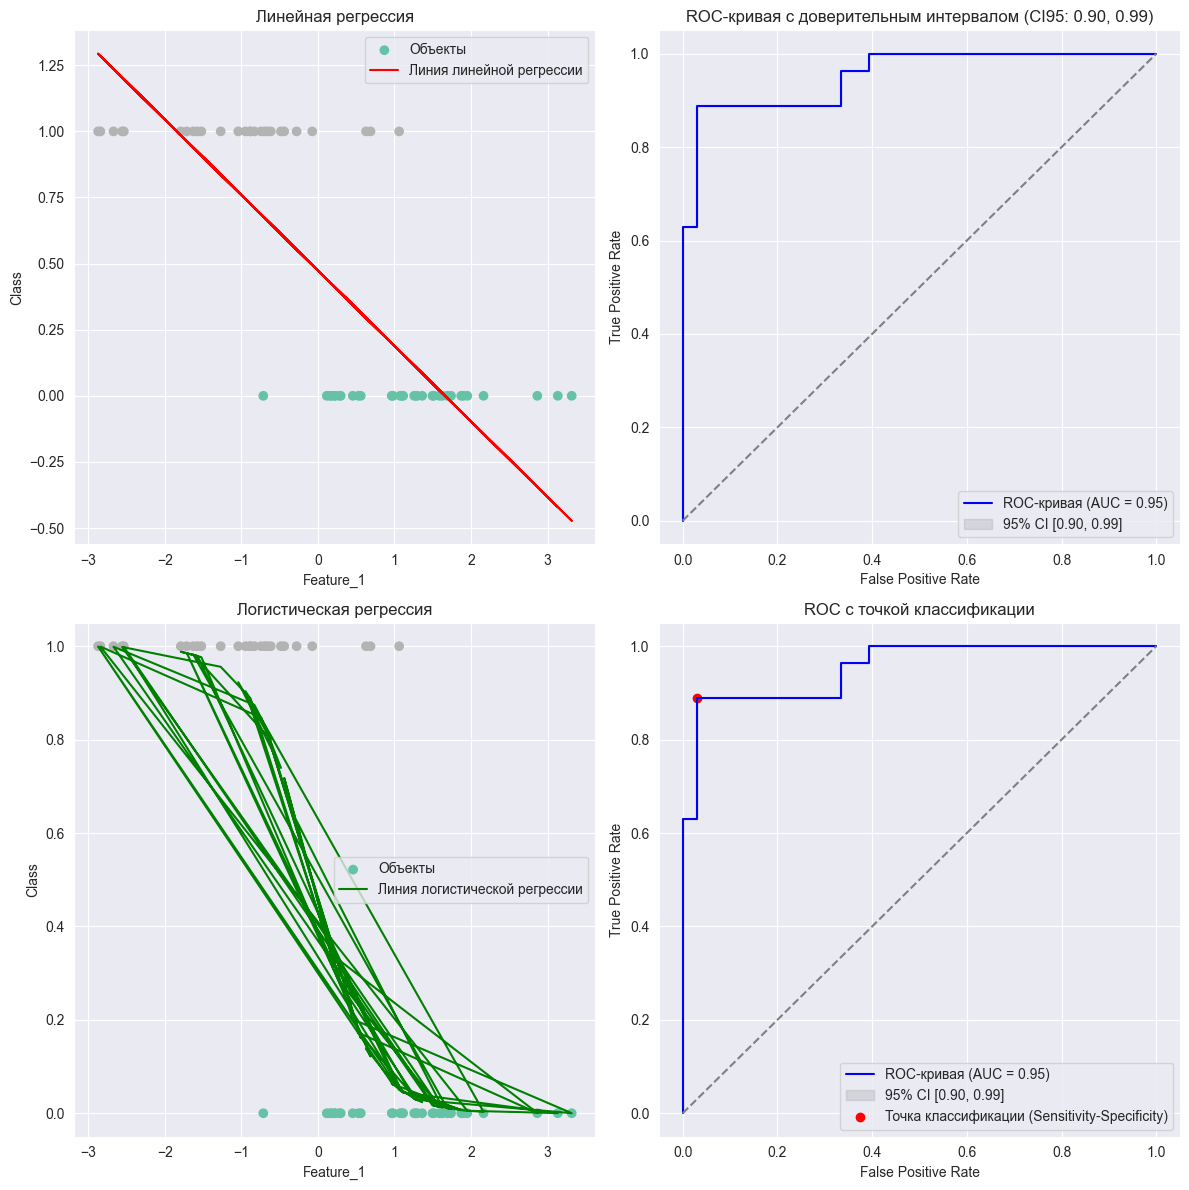

In [61]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Функция бутстрэппинга для оценки CI на AUC
def bootstrap_roc_auc(y_real, y_proba, n_bootstraps=1000, ci=95):
    bootstrapped_scores = []
    rng = np.random.RandomState(42)

    for i in range(n_bootstraps):
        # Бутстреппинг с повторной выборкой
        indices = rng.randint(0, len(y_proba), len(y_proba))
        if len(np.unique(y_real[indices])) < 2:
            continue  # Пропуск, если в выборке только один класс

        fpr, tpr, _ = roc_curve(y_real[indices], y_proba[indices])
        score = auc(fpr, tpr)
        bootstrapped_scores.append(score)
    
    sorted_scores = np.sort(bootstrapped_scores)
    lower_bound = np.percentile(sorted_scores, (100 - ci) / 2)
    upper_bound = np.percentile(sorted_scores, 100 - (100 - ci) / 2)
    
    return lower_bound, upper_bound

# Выбор пары классов (например, 0 и 1)
df_filtered = df1[(df1['Class'] == 0) | (df1['Class'] == 1)]

# Выбор признаков
X = df_filtered[['Feature_1']].values  # Количественный признак
y = df_filtered['Class'].values  # Целевая переменная (классы)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Линейная регрессия
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Логистическая регрессия
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# ROC-кривая для логистической регрессии
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Бутстрэппинг для доверительного интервала AUC
lower_auc, upper_auc = bootstrap_roc_auc(y_test, log_reg.predict_proba(X_test)[:, 1])

# Сборка массивов для расчета CI для TPR
roc_fpr_array = []
roc_tpr_array = []
for i in range(1000):
    fpr, tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
    roc_fpr_array.append(fpr)
    roc_tpr_array.append(tpr)

# Вычисление среднего и стандартного отклонения для TPR
mean_tpr = np.mean(roc_tpr_array, axis=0)
std_tpr = np.std(roc_tpr_array, axis=0)

# Вычисляем нижнюю и верхнюю границы доверительного интервала для ROC
ci_lower_roc, ci_upper_roc = mean_tpr - std_tpr, mean_tpr + std_tpr

# Построение графиков
plt.figure(figsize=(12, 12))

# Правая колонка: график с точками и линией линейной регрессии
plt.subplot(2, 2, 1)
plt.scatter(X_test, y_test, c=y_test, cmap='Set2', marker='o', label="Объекты")
plt.plot(X_test, lin_reg.predict(X_test), color='red', label='Линия линейной регрессии')
plt.title('Линейная регрессия')
plt.xlabel('Feature_1')
plt.ylabel('Class')
plt.legend()

# Правая колонка (ниже): график с точками и линией логистической регрессии
plt.subplot(2, 2, 3)
plt.scatter(X_test, y_test, c=y_test, cmap='Set2', marker='o', label="Объекты")
plt.plot(X_test, log_reg.predict_proba(X_test)[:, 1], color='green', label='Линия логистической регрессии')
plt.title('Логистическая регрессия')
plt.xlabel('Feature_1')
plt.ylabel('Class')
plt.legend()

# Левая колонка: ROC-кривая с CI
plt.subplot(2, 2, 2)
plt.plot(fpr, tpr, color='blue', label=f'ROC-кривая (AUC = {roc_auc:.2f})')
plt.fill_between(fpr, ci_lower_roc, ci_upper_roc, alpha=0.2, color='grey', label=f'95% CI [{lower_auc:.2f}, {upper_auc:.2f}]')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title(f'ROC-кривая с доверительным интервалом (CI95: {lower_auc:.2f}, {upper_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Точка классификации на ROC-кривой (Sensitivity - Specificity)
plt.subplot(2, 2, 4)
plt.plot(fpr, tpr, color='blue', label=f'ROC-кривая (AUC = {roc_auc:.2f})')
plt.fill_between(fpr, ci_lower_roc, ci_upper_roc, alpha=0.2, color='grey', label=f'95% CI [{lower_auc:.2f}, {upper_auc:.2f}]')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
optimal_idx = np.argmax(tpr - fpr)  # Точка, где разница между tpr и fpr максимальна
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label='Точка классификации (Sensitivity-Specificity)')
plt.title('ROC с точкой классификации')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.tight_layout()
plt.show()

[5] Для выбранной пары классов (включая класс с повторенными объектами) на всех признаках вычислить уравнение множественной линейной регрессии, где Y – класс, Xi – признаки.

Используя полученные уравнения множественной линейной регрессии, на основе каждого из датасетов df и df_A_B сформировать новые датасеты logdf и logdf_A_B, в каждом из которых есть только один признак Х, сформированный на основе соответствующего уравнения множественной линейной регрессии, а переменная Y – отнесение к классу.

In [71]:
# Создаем модель множественной линейной регрессии для классов 0 и 1
from sklearn.linear_model import LinearRegression

# Отбираем данные для классов 0 и 1
df_filtered = df1[(df1['Class'] == 0) | (df1['Class'] == 1)]
X = df_filtered.drop(columns='Class').values  # Все признаки
y = df_filtered['Class'].values  # Целевая переменная - класс

# Обучаем множественную линейную регрессию
multi_lin_reg = LinearRegression()
multi_lin_reg.fit(X, y)

# Выводим уравнение регрессии
coefficients = multi_lin_reg.coef_
intercept = multi_lin_reg.intercept_
print("Уравнение множественной линейной регрессии: Y = ", intercept, "+", " + ".join(f"{coef} * X{i+1}" for i, coef in enumerate(coefficients)))

Уравнение множественной линейной регрессии: Y =  0.4941543881757227 + -0.13014181537386413 * X1 + -0.10075835650490692 * X2 + -0.08422998256527968 * X3 + -0.07899481301761484 * X4


In [72]:
# Применяем уравнение для формирования нового признака в df1 и во всех df_A_B
df1['X_prime'] = multi_lin_reg.predict(df1.drop(columns='Class'))

# Применение к новым датасетам
def add_X_prime_column(df, model):
    df['X_prime'] = model.predict(df.drop(columns='Class'))
    return df

# Применяем для всех сгенерированных датасетов
df_A_1_B_5 = add_X_prime_column(df_A_1_B_5, multi_lin_reg)
df_A_10_B_5 = add_X_prime_column(df_A_10_B_5, multi_lin_reg)
df_A_100_B_5 = add_X_prime_column(df_A_100_B_5, multi_lin_reg)
df_A_1_B_10 = add_X_prime_column(df_A_1_B_10, multi_lin_reg)
df_A_10_B_10 = add_X_prime_column(df_A_10_B_10, multi_lin_reg)
df_A_100_B_10 = add_X_prime_column(df_A_100_B_10, multi_lin_reg)


C:\Users\Makovey\PycharmProjects\theory_stat_solution\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Makovey\PycharmProjects\theory_stat_solution\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Makovey\PycharmProjects\theory_stat_solution\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Makovey\PycharmProjects\theory_stat_solution\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Makovey\PycharmProjects\theory_stat_solution\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature nam

[6] Для каждого из датасетов logdf и logdf_A_B в своем пространстве Х-Y  (количественный признак-класс) построить и визуализировать объекты, линию простой линейной регрессии и линию логистической регрессии. Регрессии строить на паре Х-Y (количественный признак-класс).
 
Оценить качество работы полученных на основе логистической регрессии классификаторов, используя ROC кривые и восстановив на графике ROC кривых точку классификации Sensitivity-Specificity и доверительные интервалы CI95.
Все полученные графики возможно расположить в две колонки.

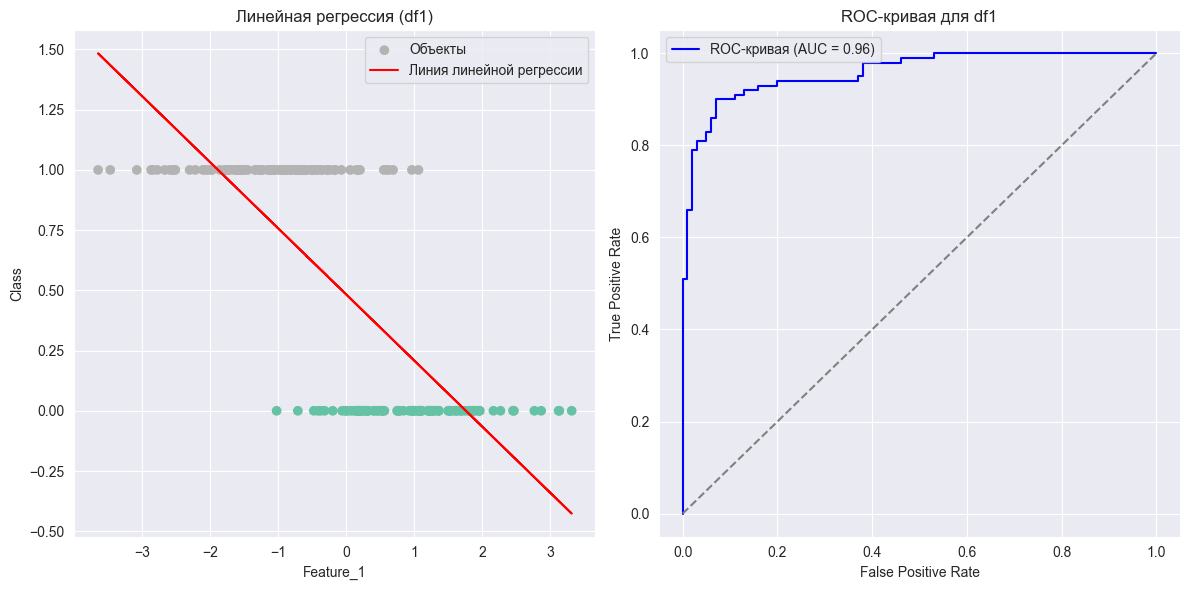

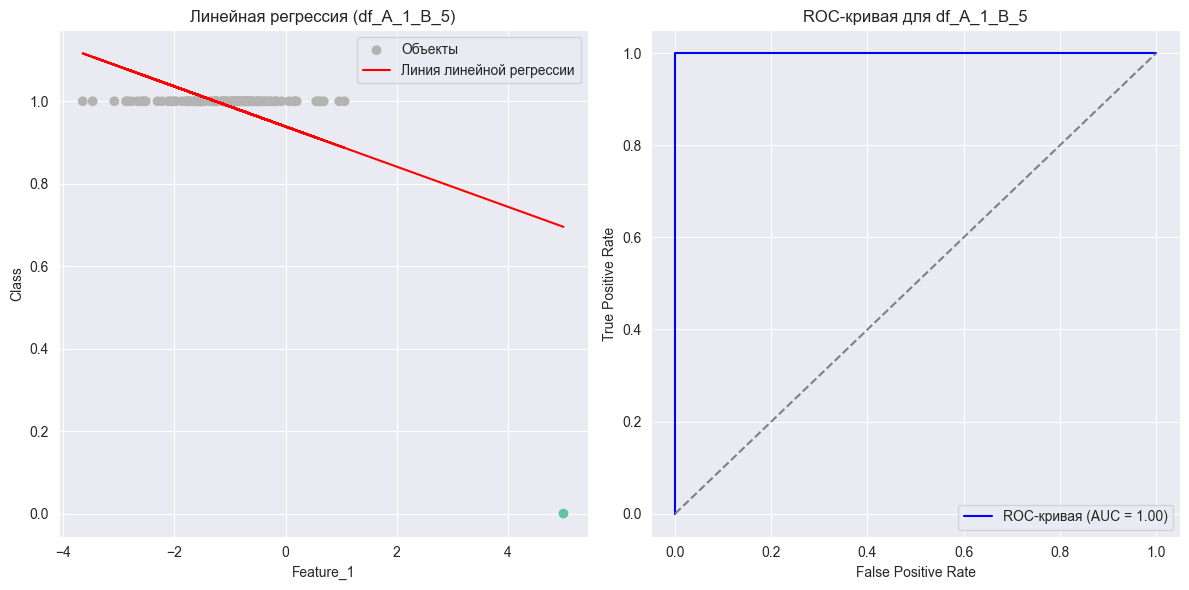

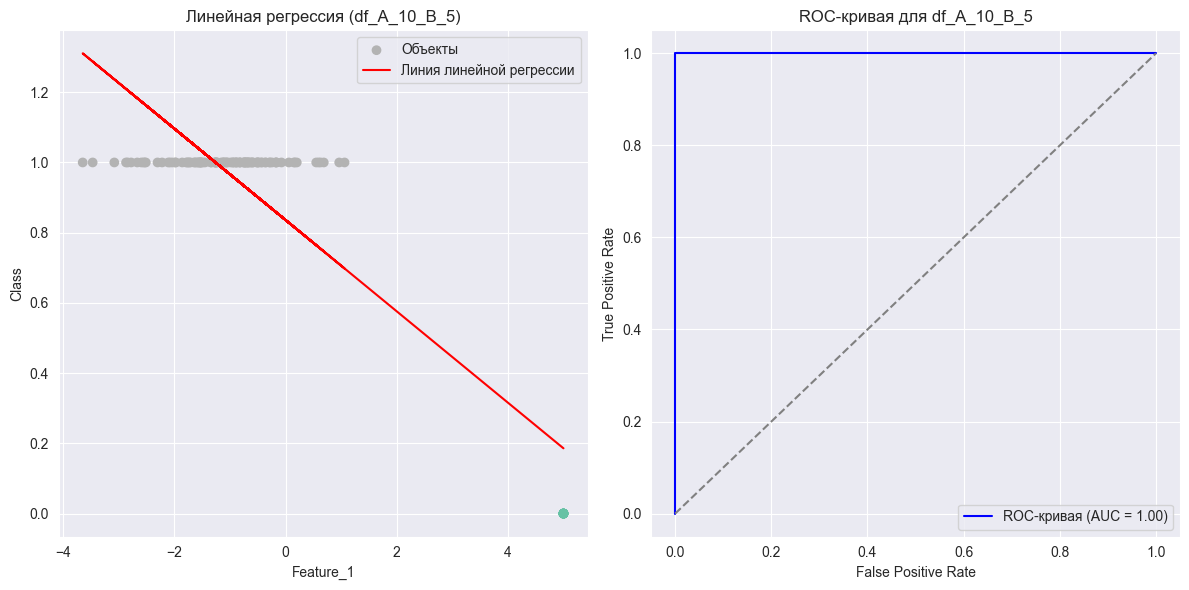

In [74]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

def plot_regressions(df, title, class_pair=(0, 1)):
    # Фильтруем классы
    df_filtered = df[df['Class'].isin(class_pair)]
    
    # Если классов в выборке недостаточно, пропускаем визуализацию
    if df_filtered['Class'].nunique() != 2:
        print(f"Недостаточно классов для {title}")
        return
    
    X = df_filtered[['Feature_1']].values
    y = df_filtered['Class'].values

    # Модели
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    
    log_reg = LogisticRegression()
    log_reg.fit(X, y)
    
    # ROC-кривая для логистической регрессии
    fpr, tpr, _ = roc_curve(y, log_reg.predict_proba(X)[:, 1], pos_label=class_pair[1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12, 6))

    # Линейная регрессия
    plt.subplot(1, 2, 1)
    plt.scatter(X, y, c=y, cmap='Set2', marker='o', label="Объекты")
    plt.plot(X, lin_reg.predict(X), color='red', label='Линия линейной регрессии')
    plt.title(f'Линейная регрессия ({title})')
    plt.xlabel('Feature_1')
    plt.ylabel('Class')
    plt.legend()

    # ROC-кривая
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color='blue', label=f'ROC-кривая (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f'ROC-кривая для {title}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Пример вызова функции для датасетов
plot_regressions(df1, "df1")
plot_regressions(df_A_1_B_5, "df_A_1_B_5")
plot_regressions(df_A_10_B_5, "df_A_10_B_5")

[7] Для выбранной пары классов (включая класс с повторенными объектами), визуализировать один из датасетов df_A_B на всех парах переменных, построив на графиках объекты, линии множественной линейной регрессии, разделение классов на основе логистической регрессии решающей функцией с contour_plot уровнями классификации.

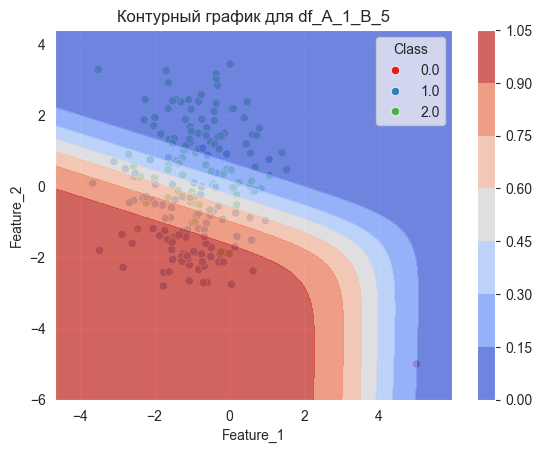

In [75]:
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression

def plot_contour_classification(df, title):
    # Используем только два признака для простоты визуализации
    X = df[['Feature_1', 'Feature_2']].values
    y = df['Class'].values

    # Логистическая регрессия
    log_reg = LogisticRegression()
    log_reg.fit(X, y)

    # Плотим точки
    sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['Class'], palette='Set1', marker='o')

    # Создаем сетку для контуров
    x_min, x_max = df['Feature_1'].min() - 1, df['Feature_1'].max() + 1
    y_min, y_max = df['Feature_2'].min() - 1, df['Feature_2'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Прогнозируем вероятности на сетке и строим контур
    Z = log_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.colorbar()
    plt.title(f'Контурный график для {title}')
    plt.xlabel('Feature_1')
    plt.ylabel('Feature_2')
    plt.show()

# Применение к одному из df_A_B
plot_contour_classification(df_A_1_B_5, "df_A_1_B_5")